# Module-3 Supervised Learning Regression analysis
- Simple Linear Regression
- Multiple Linear Regression
- Logistic Regression
- Polynomial Regression
- Evaluation Metrics - R-square,rmse,msemt-test,f-test

#  Simple linear regression

- In slr we predict the val of one variable 
- x-independent variable
- y- dependent variable
- Its called simple because it examines the relationship between two variables only
- Its linear cause as the independent variable increases the dependent variable also increases in a linear fashion (similarly for decreasing also)
- Equation: y = mx+b the goal is to find out the m and b

#### 1. importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. importing the dataset

In [2]:
data=pd.read_csv('IceCreamData.csv')
data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [3]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [4]:
x.shape,y.shape

((500, 1), (500,))

#### 3. taking care of missing data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [6]:
data.isna().sum()

Temperature    0
Revenue        0
dtype: int64

#### 4. visualizing data

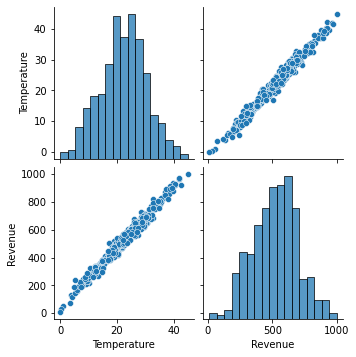

In [7]:
sns.pairplot(data)

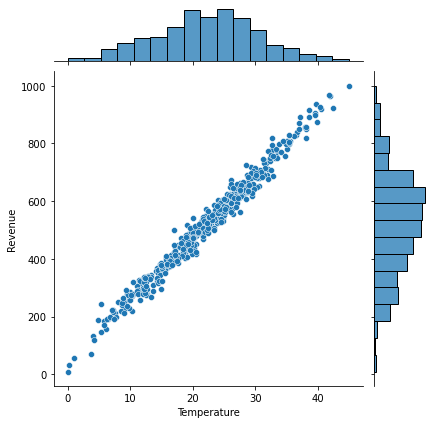

In [8]:
sns.jointplot(data=data,x='Temperature',y='Revenue')

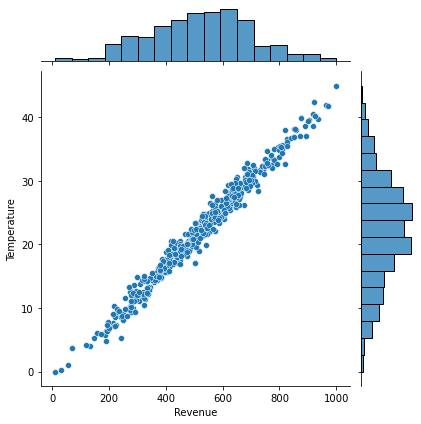

In [9]:
sns.jointplot(data=data,x='Revenue',y='Temperature')

#### 5. splitting the dataset into trainset and testset

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [11]:
#finding b and m using least square method:

def lsm(x_train,y_train):
    x=x_train
    y=y_train
    xsq=x*x #x^2
    xy_sum=0 #xy sum
    for i in range (len(x)):
        xy_sum+=(x[i]*y[i])
       
    sum_x_y=sum(x)*sum(y) #sum of x and sum of y
    sum_xsq=xsq.sum() # total sum of x^2
    sum_x_sq=x.sum()*x.sum() # sum of x^2
    n=len(x)
    
    m = (n * xy_sum - sum_x_y)/(n * sum_xsq - sum_x_sq)
    
    y_sum=y.sum()
    x_sum=x.sum()
    
    b= (y_sum - (m*x_sum))/n
    
    return m,b

#### 6. train the model

In [12]:
lsm(x_train,y_train)

(array([21.41868951]), array([45.33226523]))

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [14]:
m = model.coef_
b = model.intercept_

In [15]:
print('m-value : ',m)
print('b-value : ',b)

m-value :  [21.41868951]
b-value :  45.33226522546636


#### 7. visualise the model 

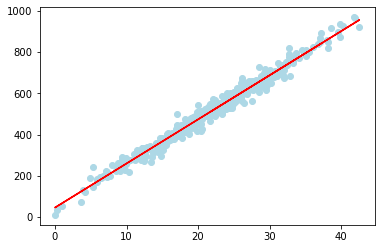

In [16]:
plt.scatter(x_train,y_train,color='lightblue')
plt.plot(x_train,model.predict(x_train),color='red')

#### 8.visualise the test results

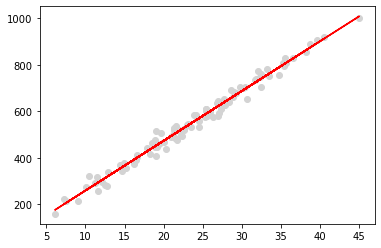

In [17]:
plt.scatter(x_test,y_test,color='lightgrey')
plt.plot(x_test,model.predict(x_test),color='red')

#### 9. evaluation of the model

- regression metrics: 

    - mean absolute error(mae)
    - mean square error(mse)
    - root mean square error(rmse)
    - r^2-coefficient of determination
    

#### 9.1 regression matrics on trainset 

In [18]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [19]:
mae = mae(y_train,model.predict(x_train))
mae

19.970898604978167

In [20]:
mse = mse(y_train,model.predict(x_train))
mse

655.3476590783878

In [21]:
np.sqrt(mse) #rmse

25.59975896524004

In [22]:
r2(y_train,model.predict(x_train))

0.9782327950769606

#### 9.2 regression matrics on testset 

In [23]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [24]:
mae = mae(y_test,model.predict(x_test))
mae

18.051694098244738

In [25]:
mse = mse(y_test,model.predict(x_test))
mse 

494.30883310089206

In [26]:
np.sqrt(mse) #rmse

22.23305721444741

In [27]:
r2(y_test,model.predict(x_test))

0.9844266191560658

#### The R-sq value is 98% high for the test set. This indicates a better fit for the model

# Multiple linear regression 

- exmaines the relationship between more than 2 variables
- each independent variable has its corresponding co-efficient

#### 1. importing libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. importing the dataset

In [29]:
d = pd.read_csv('50_Startups.csv')
d.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [30]:
x=d.iloc[:,:-1]
y=d.iloc[:,-1]

In [31]:
x.shape,y.shape

((50, 3), (50,))

#### 3. taking care of missing data

In [32]:
d.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [33]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [34]:
d.isna().any()

R&D Spend          False
Administration     False
Marketing Spend    False
Profit             False
dtype: bool

#### 4. visualizing data

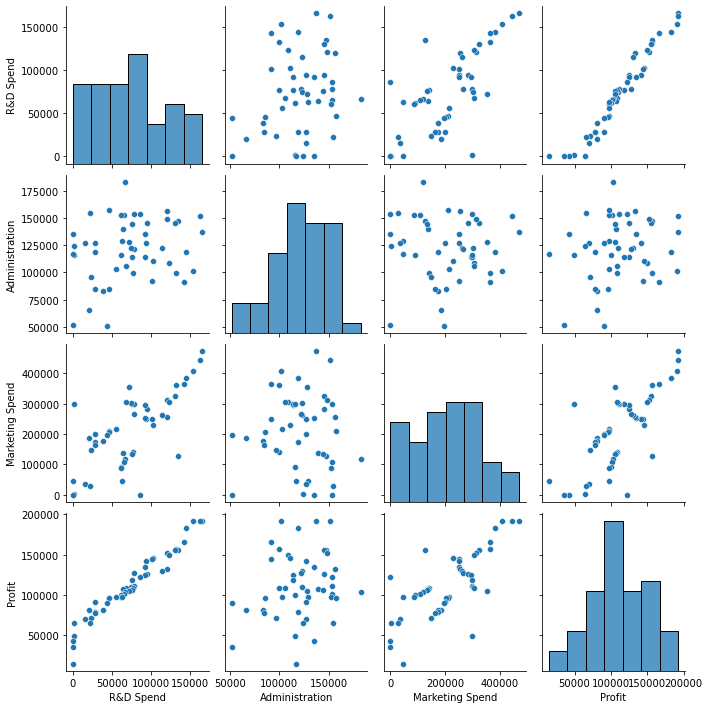

In [35]:
sns.pairplot(d)

#### 5. splitting the dataset into trainset and testset

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [37]:
from sklearn.linear_model import LinearRegression
multiple_model = LinearRegression()

In [38]:
multiple_model.fit(x_train,y_train)

LinearRegression()

In [39]:
m_value = multiple_model.coef_
b_value = multiple_model.intercept_

In [40]:
print('m-value : ',m_value)
print('b-value : ',b_value)

m-value :  [ 0.86475014 -0.06792132  0.02139137]
b-value :  50994.03580230459


#### 6.evaluate the model 

#### 6.1 Regression metrics - Trainset

In [41]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [42]:
mae = mae(y_train,multiple_model.predict(x_train))
mae

5886.176273623872

In [43]:
mse = mse(y_train,multiple_model.predict(x_train))
mse

63791287.46341429

In [44]:
np.sqrt(mse) #rmse

7986.944814095957

In [45]:
r2(y_train,multiple_model.predict(x_train))

0.9641023578625907

#### 6.2 Regression metrics - Testset

In [46]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [47]:
mae = mae(y_test,multiple_model.predict(x_test))
mae

10737.097836459161

In [48]:
mse = mse(y_test,multiple_model.predict(x_test))
mse

165466680.16373175

In [49]:
np.sqrt(mse) #rmse

12863.385252869159

In [50]:
r2(y_test,multiple_model.predict(x_test))

0.799701259166433

# Polynomial regression

- the relationship between x(independent variable) and y(dependent variable) as an nth degree polynomial in X

#### 1. importing libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. importing the dataset

In [52]:
df = pd.read_csv('EconomiesOfScale.csv')
df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [53]:
x = df.iloc[:,:-1] 
y = df.iloc[:,-1] 

In [54]:
x.shape,y.shape

((1000, 1), (1000,))

#### 3. taking care of missing data

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [56]:
df.isna().sum()

Number of Units       0
Manufacturing Cost    0
dtype: int64

#### 4. visualizing data

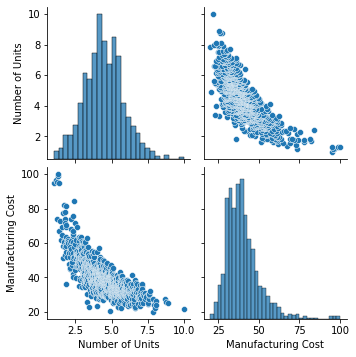

In [57]:
sns.pairplot(df)

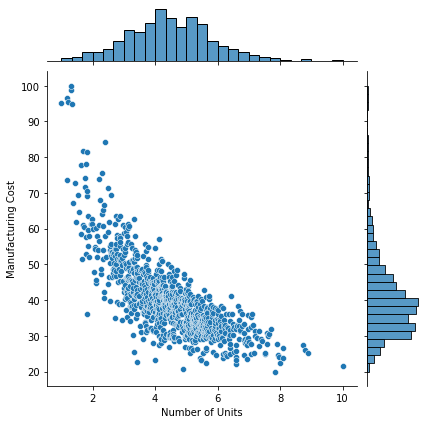

In [58]:
sns.jointplot(data=df,x='Number of Units',y='Manufacturing Cost')

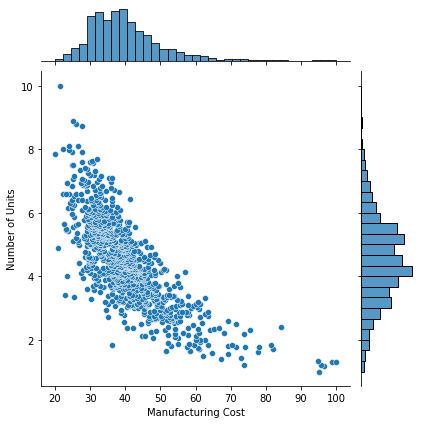

In [59]:
sns.jointplot(data=df,x='Manufacturing Cost',y='Number of Units')

#### 5. train the model

In [60]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()

In [61]:
linear_model.fit(x,y)

LinearRegression()

In [62]:
mvalue = linear_model.coef_
bvalue = linear_model.intercept_

In [63]:
print('m-value : ',mvalue)
print('b-value : ',bvalue)

m-value :  [-6.0333683]
b-value :  67.03904193389238


#### 6. visualise the model

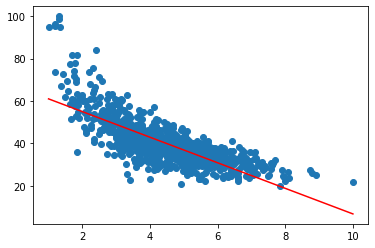

In [64]:
plt.scatter(x,y)
plt.plot(x,linear_model.predict(x),color='red')

#### 7. evaluate the model 

In [65]:
from sklearn.metrics import r2_score as r2
r2(y,linear_model.predict(x))

0.5789767558506287

#### 8. Polymonial with degree = 2,3,4

In [66]:
from sklearn.preprocessing import PolynomialFeatures as polyft
from sklearn.metrics import r2_score

In [67]:
pm1=polyft(degree=2)
pm2=polyft(degree=3)
pm3=polyft(degree=4)
pm4=polyft(degree=10)

In [68]:
newx1=pm1.fit_transform(x)
newx2=pm2.fit_transform(x)
newx3=pm3.fit_transform(x)
newx4=pm4.fit_transform(x)

In [69]:
from sklearn.linear_model import LinearRegression as lr

lm1=lr()
lm1.fit(newx1,y)

lm2=lr()
lm2.fit(newx2,y)

lm3=lr()
lm3.fit(newx3,y)

lm4=lr()
lm4.fit(newx4,y)

LinearRegression()

The r square for degree = 2 : 0.6650268116056028


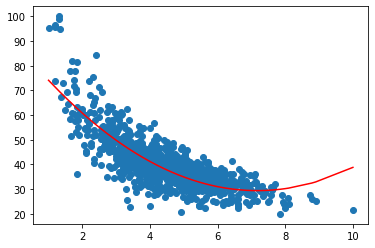

In [70]:
plt.scatter(x,y)
plt.plot(x,lm1.predict(newx1),color='red')

deg_2=r2_score(y,lm1.predict(newx1))
print('The r square for degree = 2 :',deg_2)

The r square for degree = 3 : 0.687325124688785


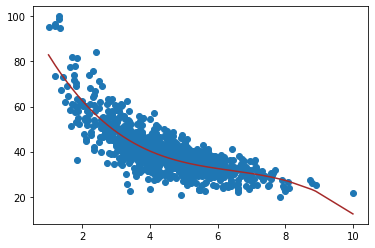

In [71]:
plt.scatter(x,y)
plt.plot(x,lm2.predict(newx2),color='brown')

deg_3=r2_score(y,lm2.predict(newx2))
print('The r square for degree = 3 :',deg_3)

The r square for degree = 4 : 0.6931523968815352


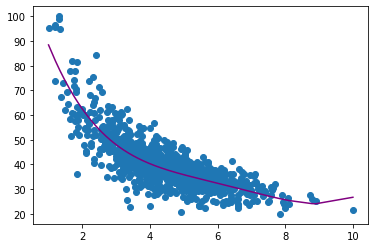

In [72]:
plt.scatter(x,y)
plt.plot(x,lm3.predict(newx3),color='purple')

deg_4=r2_score(y,lm3.predict(newx3))
print('The r square for degree = 4 :',deg_4)

The r square for degree = 4 : 0.7021227567661112


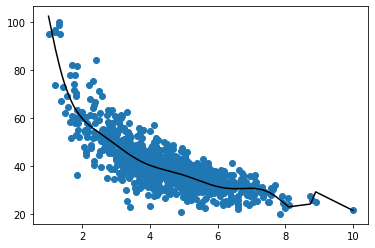

In [73]:
plt.scatter(x,y)
plt.plot(x,lm4.predict(newx4),color='black')

deg_10=r2_score(y,lm4.predict(newx4))
print('The r square for degree = 4 :',deg_10)

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.metrics import r2_score

# pm1=PolynomialFeatures(degree=2)
# newx1=pm1.fit_transform(x)

# from sklearn.linear_model import LinearRegression

# lm1=LinearRegression()
# lm1.fit(newx1,y)

# plt.scatter(x,y)
# plt.plot(x,lm1.predict(newx1),color='red')

# deg_2=r2_score(y,lm1.predict(newx1))
# print('The r square for degree = 2 :',deg_2)

# Logistic regression

#### 1. importing libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. importing the dataset

In [75]:
ds=pd.read_csv('Facebook_Ads_2.csv')
ds.head()

,Names,Time Spent on Site,Salary,Clicked
0,Martina Avila,25.649648,55330.06006,0
1,Harlan Barnes,32.456107,79049.07674,1
2,Naomi Rodriquez,20.945978,41098.60826,0
3,Jade Cunningham,54.039325,37143.35536,1
4,Cedric Leach,34.249729,37355.11276,0


In [76]:
x=ds.iloc[:,1:-1].values
y=ds.iloc[:,-1].values

In [77]:
x.shape,y.shape

((499, 2), (499,))

#### 3. taking care of missing data

In [78]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   Time Spent on Site  499 non-null    float64
 2   Salary              499 non-null    float64
 3   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.7+ KB


In [79]:
ds.isna().sum()

Names                 0
Time Spent on Site    0
Salary                0
Clicked               0
dtype: int64

#### 4. visualizing data

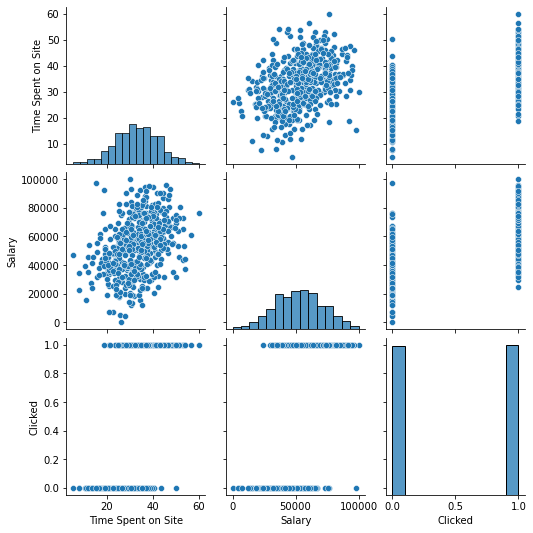

In [80]:
sns.pairplot(ds)

<AxesSubplot:xlabel='Time Spent on Site', ylabel='Salary'>

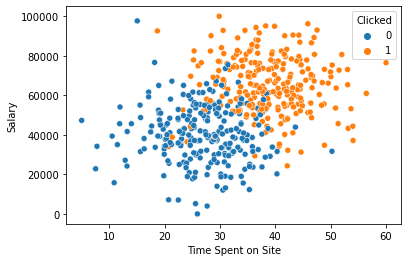

In [81]:
sns.scatterplot(data=ds,x='Time Spent on Site',y='Salary',hue='Clicked')

#### 5. splitting the dataset into trainset and testset

In [82]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.2)

In [83]:
x_train.shape,x_test.shape

((399, 2), (100, 2))

#### 6. train the model

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [86]:
ytrain_pred=log_model.predict(x_train)
ytrain_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [87]:
y_train

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,

#### 7. Accuracy Score

In [88]:
print('Accuracy : ',np.mean(y_train == ytrain_pred))

Accuracy :  0.581453634085213


In [89]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_train,ytrain_pred)

0.581453634085213

In [90]:
confusion_matrix(y_train, ytrain_pred)

array([[ 48, 156],
       [ 11, 184]], dtype=int64)

#### 8. Testing

In [91]:
ytest_pred=log_model.predict(x_test)

In [92]:
print('Accuracy : ',np.mean(y_test == ytest_pred))

Accuracy :  0.62


In [93]:
confusion_matrix(y_test, ytest_pred)

array([[13, 32],
       [ 6, 49]], dtype=int64)

#### 9. Feature scaling

In [94]:
from sklearn.preprocessing import StandardScaler as stdscale
sc = stdscale()

In [95]:
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

#### 10. Re-train the model: 

In [96]:
from sklearn.linear_model import LogisticRegression as LogR
logit = LogR()
logit.fit(x_train,y_train)

LogisticRegression()

In [97]:
y_trainpred = logit.predict(x_train)
y_trainpred

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,

In [98]:
print("Accuracy score:",np.mean(y_trainpred== y_train))

Accuracy score: 0.9197994987468672


In [99]:
accuracy_score(y_train,y_trainpred)

0.9197994987468672

#### test prediction

In [100]:
logit.fit(x_test,y_test)

LogisticRegression()

In [101]:
y_testpred = logit.predict(x_test)
y_testpred

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [102]:
print("Accuracy score:",np.mean(y_testpred== y_test))

Accuracy score: 0.91


In [103]:
accuracy_score(y_test,y_testpred)

0.91

In [104]:
confusion_matrix(y_test,y_testpred)

array([[39,  6],
       [ 3, 52]], dtype=int64)